In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load Datasets

Customers = pd.read_csv('Customers.csv')
Products = pd.read_csv('Products.csv')
Transactions = pd.read_csv('Transactions.csv')

In [3]:
print(Customers.shape)
print(Products.shape)
print(Transactions.shape)

(200, 4)
(100, 4)
(1000, 7)


In [4]:
Customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
# Check null values for dataset

print("------------Customers File--------------")
print(Customers.isnull().sum())
print("------------Products File--------------")
print(Products.isnull().sum())
print("------------Transactions File--------------")
print(Transactions.isnull().sum())

------------Customers File--------------
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
------------Products File--------------
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
------------Transactions File--------------
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
print("------------Customers File-------------- \n" )
Customers.info()
print("\n" )

print("------------Products File-------------- \n")
Products.info()
print("\n" )

print("------------Transactions File--------------\n")
Transactions.info()

------------Customers File-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


------------Products File-------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


------------Transactions File--------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries,

In [9]:
# identification of redundancies

print("------------Customers File--------------")
print(Customers.duplicated().sum())
print("------------Products File--------------")
print(Products.duplicated().sum())
print("------------Transactions File--------------")
print(Transactions.duplicated().sum())

------------Customers File--------------
0
------------Products File--------------
0
------------Transactions File--------------
0


In [10]:
# describe

print("------------Customers File--------------")
print(Customers.describe())
print("------------Products File--------------")
print(Products.describe())
print("------------Transactions File--------------")
print(Transactions.describe())

------------Customers File--------------
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
------------Products File--------------
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
------------Transactions File--------------
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [11]:
# Convert SignupDate columns to datetime

Customers['SignupDate'] = pd.to_datetime(Customers['SignupDate'])
print(Customers.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None


In [12]:
# convert TransactionDate columns to Datetime

Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])
print(Transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


#  Customer Analysis

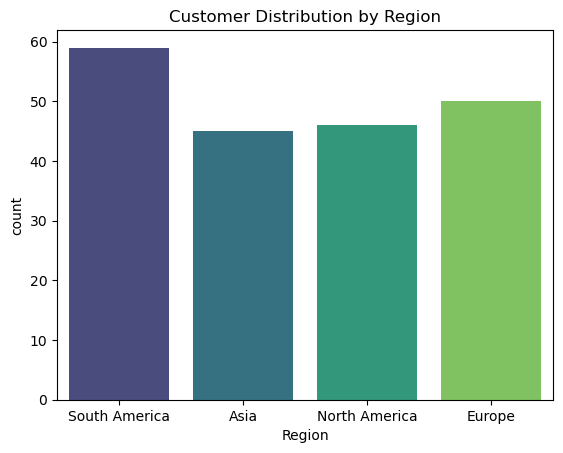

In [15]:
# Customer distribution by region
sns.countplot(x=Customers['Region'], palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()


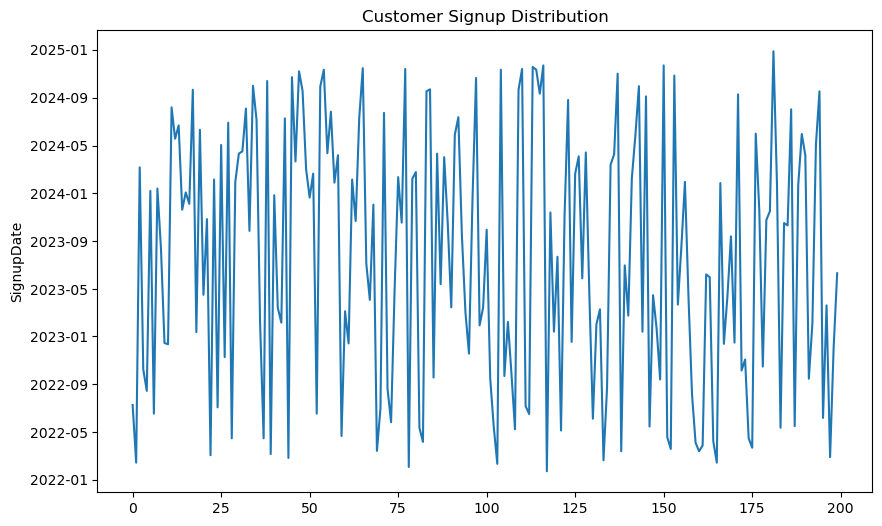

In [22]:
  #boxplot
plt.figure(figsize=(10, 6))
sns.lineplot(Customers['SignupDate'], palette='coolwarm' )
plt.title('Customer Signup Distribution')
plt.show()

#  Product Analysis

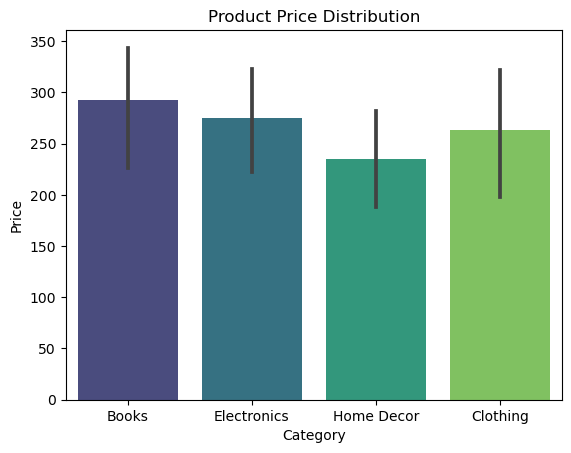

In [23]:
sns.barplot(data=Products, x="Category" , y="Price", palette='viridis')
plt.title('Product Price Distribution')
plt.show()

# Transactions

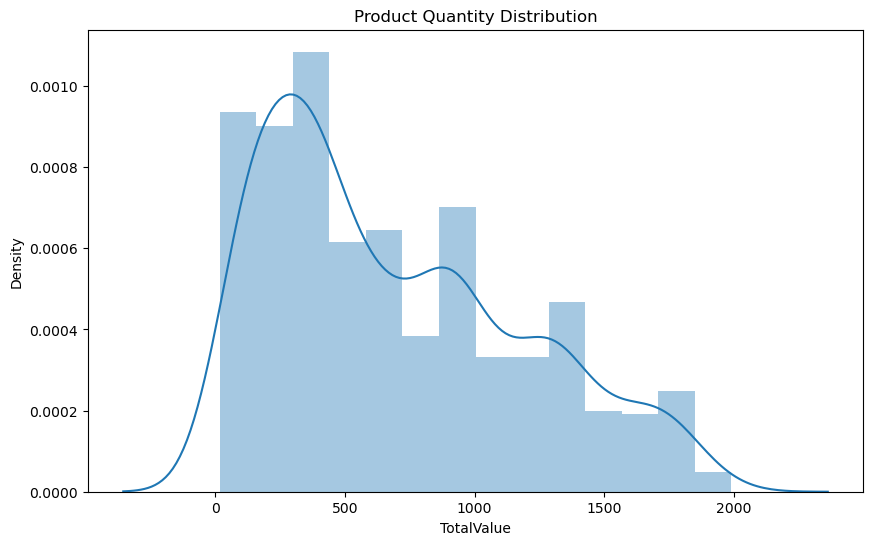

In [24]:
plt.figure(figsize=(10, 6))
sns.distplot(Transactions['TotalValue'])
plt.title('Product Quantity Distribution')
plt.show()

In [25]:
# Merge the datasets for comprehensive analysis
merge_df = pd.merge(Transactions, Customers, on='CustomerID')
merge_df = pd.merge(merge_df, Products, on='ProductID') 
merge_df.head() 

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


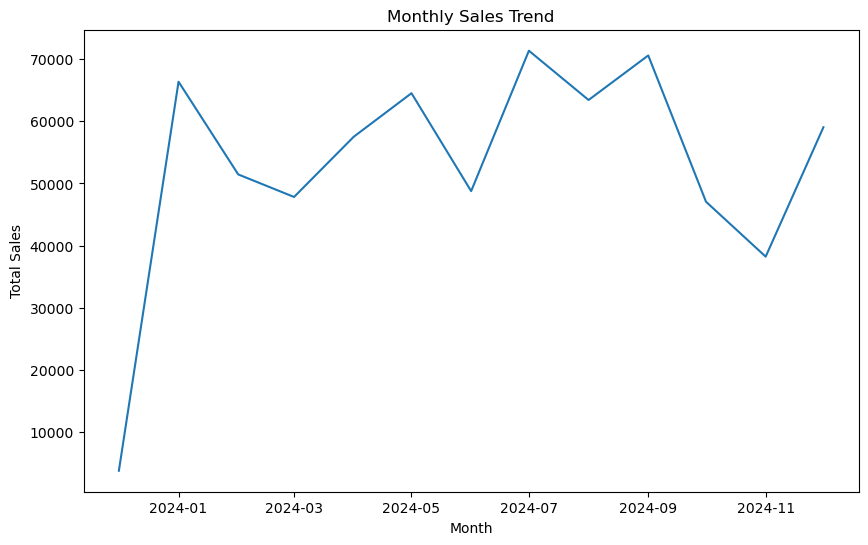

In [26]:
# 1. Analyze sales trends over time

monthly_sales = merge_df.groupby(merge_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

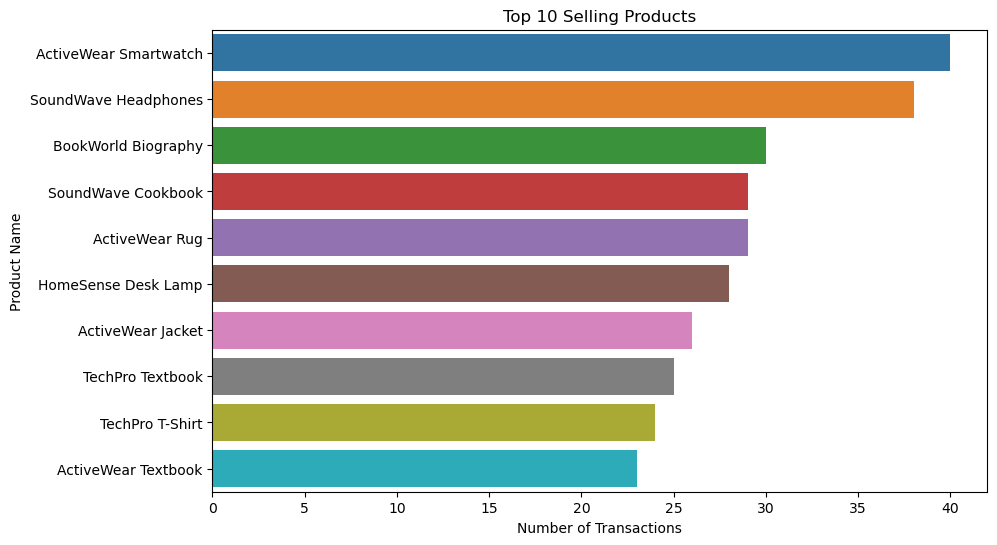

In [27]:
# 2. Identify top-selling products

top_products = merge_df.groupby('ProductName')['TransactionID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.xlabel('Number of Transactions')
plt.ylabel('Product Name')
plt.title('Top 10 Selling Products')
plt.show()

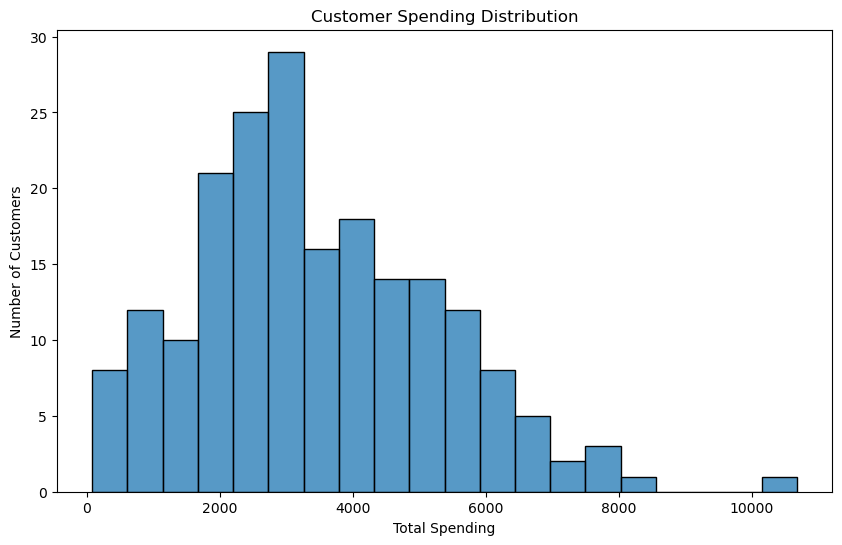

In [28]:
# 3. Customer Segmentation based on spending
customer_spending = merge_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=20)
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.title('Customer Spending Distribution')
plt.show()




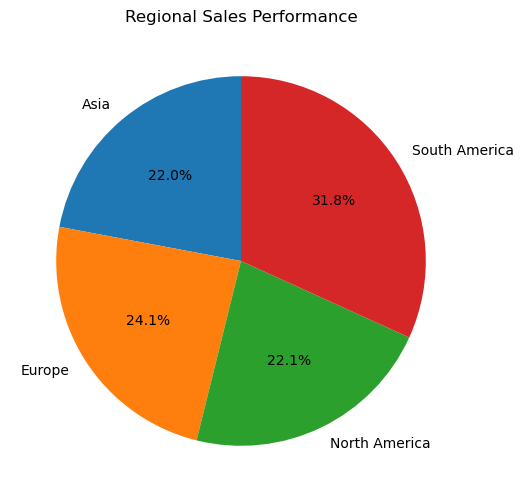

In [29]:
# 4. Regional Sales Performance
regional_sales = merge_df.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Regional Sales Performance')
plt.show()


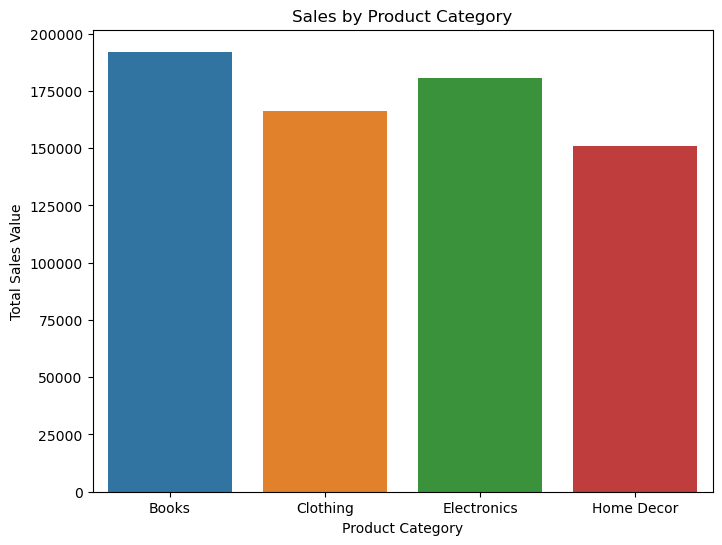

In [30]:
# 5.  Product Category Analysis
category_sales = merge_df.groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values )
plt.xlabel('Product Category')
plt.ylabel('Total Sales Value')
plt.title('Sales by Product Category')
plt.show()